<a href="https://colab.research.google.com/github/tiravata/2014-slides/blob/master/3_1_Mask_RCNN_Object_dection_myedit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><img height="45px" src="https://avatars3.githubusercontent.com/u/20337240?s=460&v=4" align="left" hspace="10px" vspace="0px">
</div>
<h1>โมเดลแบบ Mask RCNN</h1>

ความสามารถ
* Object Detection
* Segmentation

<hr>

<a href='https://www.facebook.com/programmerthai'><font color='green'>สรุปและเรียบเรียงโดย โปรแกรมเมอร์ไทย thai programmer</font></a>



cite 

*   https://github.com/matterport/Mask_RCNN
*  https://colab.research.google.com/github/zaidalyafeai/Notebooks/blob/master/Mask_RCNN.ipynb
* https://github.com/matterport/Mask_RCNN/files/4499391/MaskRCNN_180420.zip 

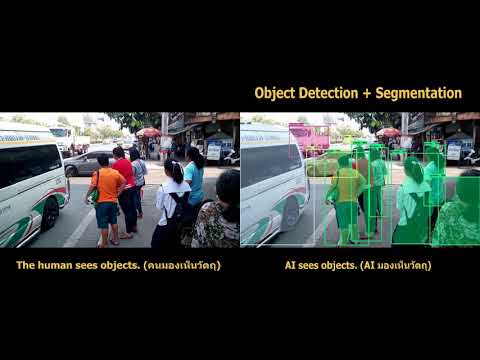

In [ ]:
#@title Object Detection and Segmentation
#@markdown คนมองเห็น vs AI มองเห็น
from IPython.display import YouTubeVideo
YouTubeVideo('qQ1OuP95Zu4', width=600, height=400)

# วิธีใช้งาน colab

Colab พัฒนาโดย google เป็นหน้าเว็บเอาไว้ใช้เขียนโค้ด python ได้ผ่านทางหน้าเว็บ และเชื่อมต่อกับ google drive ของเราก็ได้ด้วย ซึ่ง colab หน้านี้**ได้รวบรวมเนื้อหา Python ของม.ต้น** เอาไว้ แต่ก่อนอื่นอยากให้ดูวิธีการใช้งาน colab เสียก่อน

<font color='red'>** ต้องมี Gmail และ google drive</font>

<hr/>

<h3>วิธี 1) กด "Open in playgrouhd"</h3>
<div>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2020/05/python_matayom_4.png" align="center" hspace="10px" vspace="0px">


<hr/>

<h3>วิธี 2) กด Save a copy in Drive ... เพื่อบันทึกไว้ google drive เครื่องเรา</h3>

<img height="300px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_1.png" align="center" hspace="10px" vspace="0px">

<br/>

<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_2.png" align="center" hspace="10px" vspace="0px">

<hr/>

<h3>จากนั้นถึงจะสามารถรันได้</h3>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_3.png" align="center" hspace="10px" vspace="0px">


# Setup Environments

In [ ]:
#!pip install imgaug
#!pip install Cython
!pip install pycocotools
#!pip install kaggle
!pip install mrcnn
#!pip install Pillow==5.3.0
#!pip install scikit-image
#!pip install tensorflow==1.14.0
!pip install tensorflow==1.9.0
!pip install keras==2.2.0
#!pip install pycocotools
#print("Installed packages")

'''
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install kaggle
'''

     |████████████████████████████████| 61kB 2.3MB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-cp36-none-any.whl size=54931 sha256=976eb4e6584f73b51232253e6a10af331f6bb21ab43a3f73f8f456587ed64806
  Stored in directory: /root/.cache/pip/wheels/11/ed/28/e550ddc897c04c336b923eae4eb35c9aae993d20ce39d9cc40
Successfully built mrcnn
     |████████████████████████████████| 51.1MB 65kB/s 
     |████████████████████████████████| 3.3MB 15.6MB/s 
     |████████████████████████████████| 573kB 30.9MB/s 
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: google-auth 1.7.2 has requirement setuptools>=40.3.0, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installati

     |████████████████████████████████| 307kB 3.0MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
  Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0
  Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


'\n!pip install imgaug\n!pip install Cython\n!pip install pycocotools\n!pip install kaggle\n'

Clone Repo

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 116.75 MiB | 31.47 MiB/s, done.
Resolving deltas: 100% (567/567), done.


เปลี่ยนไดเรคเทอรี่

In [ ]:
import os 
os.chdir('Mask_RCNN/samples')

# เตรียมโมเดล (Prepare Model)

In [ ]:
#import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from mrcnn.config import Config

#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

# Root directory of the project
ROOT_DIR = os.path.abspath("../")


import warnings
warnings.filterwarnings("ignore")

 #Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
 #Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Using TensorFlow backend.


... done downloading pretrained model!


# Create Inference Object

In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [ ]:
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=ROOT_DIR)
# Load weights trained on MS-COCO

from keras.engine import saving
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# ทำนายและตีกรอบลากเส้นวัตถุต่างๆ ในรูป (Prediction and Visualization)

In [ ]:
!wget https://mediathaithep.com/wp-content/uploads/2018/04/facebook-1-696x392.jpg -O /content/test.jpg

--2020-05-16 07:30:07--  https://mediathaithep.com/wp-content/uploads/2018/04/facebook-1-696x392.jpg
Resolving mediathaithep.com (mediathaithep.com)... 163.44.198.59
Connecting to mediathaithep.com (mediathaithep.com)|163.44.198.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74343 (73K) [image/jpeg]
Saving to: ‘/content/test.jpg’

/content/test.jpg   100%[===================>]  72.60K  85.5KB/s    in 0.8s    

2020-05-16 07:30:09 (85.5 KB/s) - ‘/content/test.jpg’ saved [74343/74343]



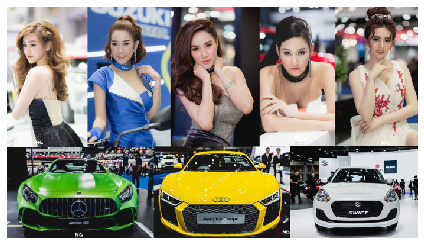

In [ ]:
plt.axis('off')
skimage.io.imshow('/content/test.jpg')

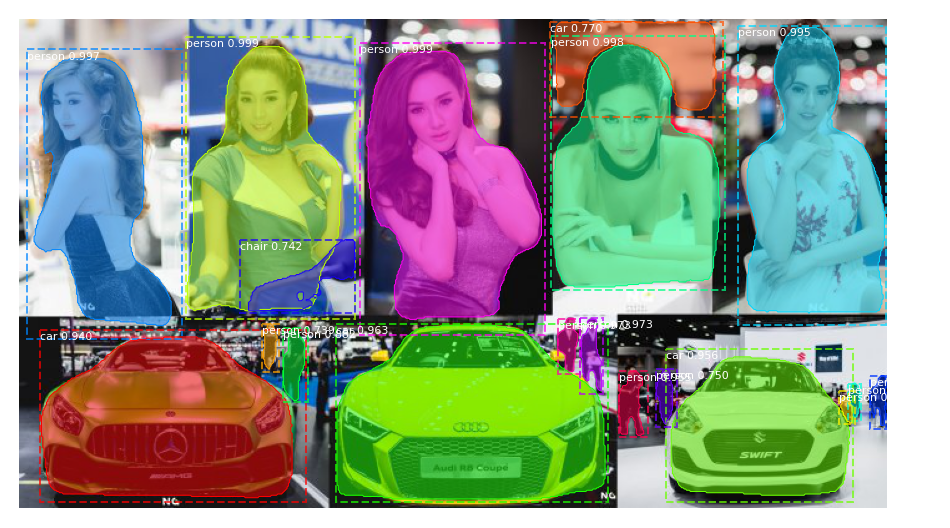

In [ ]:
path = '/content/test.jpg'
image = skimage.io.imread(path)

# Run detection
results = model.detect([image], verbose=0)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

# ลบภาพพื้นหลังออก (Background Removal)

In [ ]:
!wget https://news.thaiware.com/upload_misc/news/2019_03/images/16107_1903281714007P_14.jpg -O /content/test2.jpg

--2020-05-16 07:36:00--  https://news.thaiware.com/upload_misc/news/2019_03/images/16107_1903281714007P_14.jpg
Resolving news.thaiware.com (news.thaiware.com)... 203.146.253.31
Connecting to news.thaiware.com (news.thaiware.com)|203.146.253.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1549255 (1.5M) [image/jpeg]
Saving to: ‘/content/test2.jpg’

/content/test2.jpg  100%[===================>]   1.48M   536KB/s    in 2.8s    

2020-05-16 07:36:04 (536 KB/s) - ‘/content/test2.jpg’ saved [1549255/1549255]



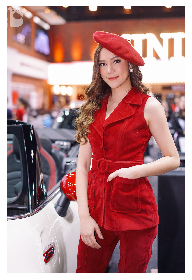

In [ ]:
plt.axis('off')
skimage.io.imshow('/content/test2.jpg')

In [ ]:
def segment(image, r):
  idx = r['scores'].argmax()
  mask = r['masks'][:,:,idx]
  mask = np.stack((mask,)*3, axis=-1)
  mask = mask.astype('uint8')
  bg = 255 - mask * 255
  mask_img = image*mask
  result = mask_img+ bg
  return result

ตัวอย่างลบภาพพื้นหลังออก

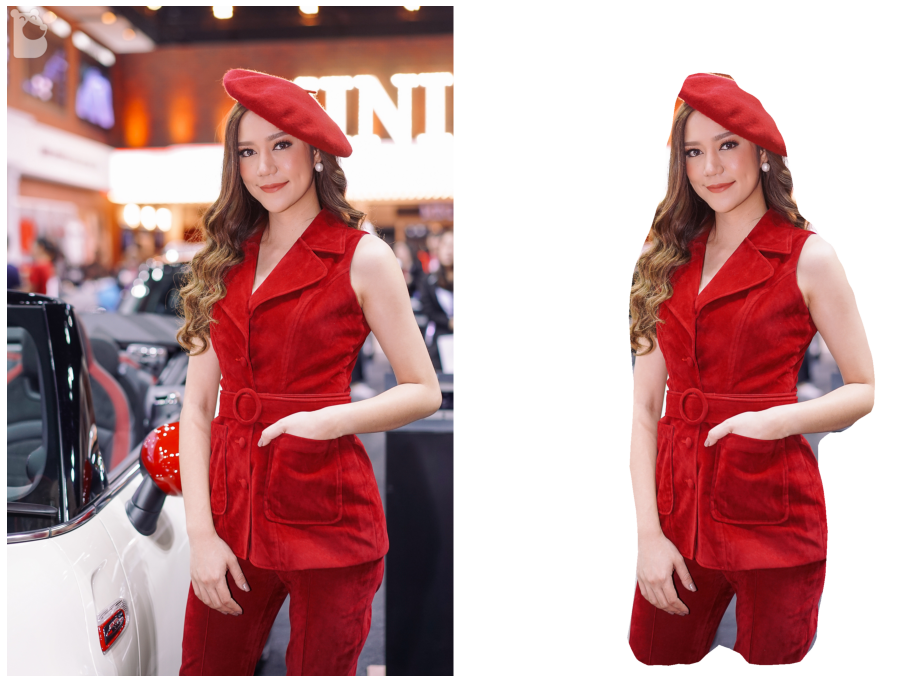

In [ ]:
path = '/content/test2.jpg'
image = skimage.io.imread(path)
# Run detection
results = model.detect([image], verbose=0)
r = results[0]

segmentation = segment(image, r)
plt.subplots(1, figsize=(16, 16))
plt.axis('off')
plt.imshow(np.concatenate([image, segmentation], axis = 1))

# Mounting Google Drive locally


In [ ]:
'''
from google.colab import drive
drive.mount('/content/gdrive')
'''

# Process Video

In [ ]:
import colorsys
def random_colors(N, bright=True):
	"""
	Generate random colors.
	To get visually distinct colors, generate them in HSV space then
	convert to RGB.
	"""
	brightness = 1.0 if bright else 0.7
	hsv = [(i / N, 1, brightness) for i in range(N)]
	colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
	random.shuffle(colors)
	return colors

In [ ]:
def display_instances(image, boxes, masks, class_ids, class_names,
					  scores=None, title="",
					  figsize=(16, 16), ax=None,
					  show_mask=True, show_bbox=True,
					  colors=None, captions=None):
	"""
	boxes: [num_instance, (y1, x1, y2, x2, class_id)] in image coordinates.
	masks: [height, width, num_instances]
	class_ids: [num_instances]
	class_names: list of class names of the dataset
	scores: (optional) confidence scores for each box
	title: (optional) Figure title
	show_mask, show_bbox: To show masks and bounding boxes or not
	figsize: (optional) the size of the image
	colors: (optional) An array or colors to use with each object
	captions: (optional) A list of strings to use as captions for each object
	"""
	# Number of instances
	N = boxes.shape[0]
	if not N:
		#print("\n*** No instances to display *** \n")
		pass
	else:
		assert boxes.shape[0] == masks.shape[-1] == class_ids.shape[0]

	# If no axis is passed, create one and automatically call show()
	"""
	auto_show = False
	if not ax:
		_, ax = plt.subplots(1, figsize=figsize)
		auto_show = True
	"""
	# Generate random colors
	colors = colors or random_colors(N)

	# Show area outside image boundaries.
	"""
	height, width = image.shape[:2]
	ax.set_ylim(height + 10, -10)
	ax.set_xlim(-10, width + 10)
	ax.axis('off')
	ax.set_title(title)
	"""
	
	#masked_image = image.astype(np.uint32).copy()	
	masked_image = image.copy()
	for i in range(N):
		color = colors[i]
		
		score = scores[i] if scores is not None else 0
		cv2_color = 255*score*np.asarray(color)
		cv2_color  = cv2_color.astype(int)
		cv2_color  = cv2_color.tolist()
		
		# Bounding box
		box = boxes[i]
		if not np.any(boxes[i]):
			# Skip this instance. Has no bbox. Likely lost in image cropping.
			continue
		y1, x1, y2, x2 = boxes[i]
		if show_bbox:
			cv2.rectangle(masked_image, (x1, y1), (x2 , y2) , cv2_color, 1)
			
		"""
		# Bounding box
		if not np.any(boxes[i]):
			# Skip this instance. Has no bbox. Likely lost in image cropping.
			continue
		y1, x1, y2, x2 = boxes[i]
		if show_bbox:
			p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
								alpha=0.7, linestyle="dashed",
								edgecolor=color, facecolor='none')
			ax.add_patch(p)

		# Label
		if not captions:
			class_id = class_ids[i]
			score = scores[i] if scores is not None else None
			label = class_names[class_id]
			x = random.randint(x1, (x1 + x2) // 2)
			caption = "{} {:.3f}".format(label, score) if score else label
		else:
			caption = captions[i]
		ax.text(x1, y1 + 8, caption,
				color='w', size=11, backgroundcolor="none")
		"""
		# Label
		if not captions:
			class_id = class_ids[i]
			#score = scores[i] if scores is not None else None
			label = class_names[class_id]
			x = random.randint(x1, (x1 + x2) // 2)
			caption = "{} {:.3f}".format(label, score) if score else label
		else:
			caption = captions[i]
			
		x_offset=0; y_offset=-5;
		font_scale=1.0; thickness=1;		
		cv2.putText(masked_image, caption, (x1 + x_offset, y1 + y_offset),
				#cv2.FONT_HERSHEY_SIMPLEX,
        cv2.FONT_HERSHEY_PLAIN,
        #cv2.FONT_HERSHEY_COMPLEX,
				font_scale, cv2_color, thickness, cv2.LINE_AA)		        
    
		# Mask
		mask = masks[:, :, i]		
		if show_mask:
			masked_image = visualize.apply_mask(masked_image, mask, color)

		# Mask Polygon
		# Pad to ensure proper polygons for masks that touch image edges.
		"""
		padded_mask = np.zeros(
			(mask.shape[0] + 2, mask.shape[1] + 2), dtype=np.uint8)
		padded_mask[1:-1, 1:-1] = mask
		contours = find_contours(padded_mask, 0.5)
		for verts in contours:
			# Subtract the padding and flip (y, x) to (x, y)
			verts = np.fliplr(verts) - 1
			p = Polygon(verts, facecolor="none", edgecolor=color)
			ax.add_patch(p)
		"""
	"""
	ax.imshow(masked_image.astype(np.uint8))
	if auto_show:
		plt.show()
	"""
	return masked_image

# ดาวน์โหลดวีดีโอตัวอย่าง

In [ ]:
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl
!pip uninstall -y opencv-python opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://youtu.be/BL0f24Img5U -f 22 -o video.mp4
#!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4
!ffmpeg -i video.mp4 -ss 00:00:15 -to 00:00:30 -c:v copy video-clip.mp4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-opencv is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
[youtube] BL0f24Img5U: Downloading webpage
[download] video.mp4 has already been downloaded
[download] 100% of 36.25MiB
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg 

In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_encoded = open( 'video-clip.mp4', "rb").read()
data_url = "data:video/mp4;base64," + b64encode(video_encoded).decode()
HTML('<video width=500 controls> <source src="%s" type="video/mp4"></video>' % data_url)

# Extract frames from video

In [ ]:
def resize_image(image, W):
  height, width, depth = image.shape
  imgScale = W/width
  return cv2.resize(image, None,fx=imgScale, fy=imgScale)

In [ ]:
!mkdir /content/tmp/
!mkdir /content/tmp/images

mkdir: cannot create directory ‘/content/tmp/’: File exists


In [ ]:
import cv2
import time

TMP_DIR = "/content/tmp/"
#INPUT_VIDEO = os.path.join(TMP_DIR,"video-clip.mp4")
INPUT_VIDEO = "video-clip.mp4"
TMP_IMG = os.path.join(TMP_DIR,"images")


import os
import os.path
import shutil
"""
for filename in os.listdir(TMP_IMG):
    filepath = os.path.join(TMP_IMG, filename)
    try:
        shutil.rmtree(filepath)
    except OSError:
        os.remove(filepath)
"""
count=1
save = True
if save:
  # Save video
  cap = cv2.VideoCapture(INPUT_VIDEO)
  width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
  height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # float
  fps = cap.get(cv2.CAP_PROP_FPS) # float
	
  property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
  total_frame = int(cv2.VideoCapture.get(cap, property_id))
  print("Total frames %s , FPS=%s , width=%s, hight=%s" % (total_frame, fps, width, height))

  #fourcc = cv2.VideoWriter_fourcc(*'MJPG')
  #out = cv2.VideoWriter(path_video_out, fourcc, fps, (int(width), int(height)))
else:
  # From webcam
  # starting video streaming
  cv2.namedWindow('window_frame')
  cap = cv2.VideoCapture(0)

fps_time = time.time()
count=0
frames = []

batch_size = 3
class InferenceConfig(coco.CocoConfig):
        GPU_COUNT = 1
        IMAGES_PER_GPU = batch_size
        #IMAGES_PER_GPU = 1

config = InferenceConfig()
#config.display()

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)
  
while cap.isOpened():
	
	# now = time.time()
	# Capture frame-by-frame	
	ret, frame_image = cap.read()
		
	if not ret: # stop
		break
 

	count+=1
	if count >= 1 and count <= 20:
		pass
	else:
		continue
    
	frame_image = resize_image(frame_image, W=640)  
	frames.append(frame_image) 
	print("FPS %d: %f" % ( count , (1.0 / (time.time() - fps_time) )) )   
	if len(frames) == batch_size:
    # Run detection 		
		try:
		  results = model.detect(frames, verbose=0)       
		  for i, item in enumerate(zip(frames, results)):
			  frame_image = item[0]
			  r = item[1]
			  disp_image = display_instances(
			     frame_image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores']
			  )

			  name = os.path.join(TMP_IMG, "pic_%04d.jpg" % (count+ i - batch_size) )
			  cv2.imwrite(name, disp_image )
			  print('writing to file:{0}'.format(name))
      # Clear the frames array to start the next batch
		  frames = []
		except Exception as ex:
		  print(ex)
	 
	
		# Visualize results
	#results = model.detect([frame_image], verbose=0)  
	#r = results[0]
	#disp_image = display_instances(frame_image, r['rois'], r['masks'], r['class_ids'], 
	#						class_names, r['scores'])
	
	#file_name = "pic_%04d.jpg" % count
	#cv2.imwrite( os.path.join(TMP_IMG,  file_name) , disp_image )
        
    
	"""
	if save :
	  #out.write(disp_image)
	  print("frame %d -> %d" % (count, total_frame) , end="\r", flush=True); 
	else:
	  cv2.imshow('window_frame', bgr_image)
	  #print("FPS: {:0.2f}".format(1 / (time.time() - now)), end="\r", flush=True)
	"""	  
	fps_time = time.time()
	

	

cap.release()

Total frames 299 , FPS=29.97002997002997 , width=1280.0, hight=720.0
FPS 1: 0.077928
FPS 2: 265.143435
FPS 3: 131.738928
writing to file:/content/tmp/images/pic_0000.jpg
writing to file:/content/tmp/images/pic_0001.jpg
writing to file:/content/tmp/images/pic_0002.jpg
FPS 4: 76.997852
FPS 5: 86.346969
FPS 6: 113.448487
writing to file:/content/tmp/images/pic_0003.jpg
writing to file:/content/tmp/images/pic_0004.jpg
writing to file:/content/tmp/images/pic_0005.jpg
FPS 7: 104.416441
FPS 8: 132.933063
FPS 9: 108.635396
writing to file:/content/tmp/images/pic_0006.jpg
writing to file:/content/tmp/images/pic_0007.jpg
writing to file:/content/tmp/images/pic_0008.jpg
FPS 10: 286.339705
FPS 11: 94.404646
FPS 12: 305.328966
writing to file:/content/tmp/images/pic_0009.jpg
writing to file:/content/tmp/images/pic_0010.jpg
writing to file:/content/tmp/images/pic_0011.jpg
FPS 13: 147.962888
FPS 14: 130.399627
FPS 15: 303.451310
writing to file:/content/tmp/images/pic_0012.jpg
writing to file:/conten

ดูตัวอย่างหลังทำ segmentation แต่ละ frame

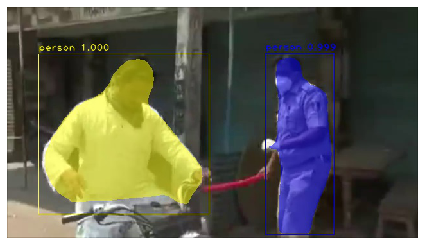

In [ ]:
plt.axis('off')
skimage.io.imshow("/content/tmp/images/pic_0002.jpg")


# Create viedoes

In [ ]:
from os import listdir
from os.path import isfile, join

#OUTPUT_VIDEO =  os.path.join(TMP_DIR,"output.avi")
OUTPUT_VIDEO =  join(TMP_DIR,"output.mp4")

file_array = [f for f in listdir(TMP_IMG) if isfile(join(TMP_IMG,f)) and 'pic_' in f]
file_array.sort()

img = cv2.imread(join(TMP_IMG,file_array[0]))
height, width, layers = img.shape
size = (width,height)

cap = cv2.VideoCapture(INPUT_VIDEO)
#width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
#height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # float

fps = cap.get(cv2.CAP_PROP_FPS) # float
	
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
total_frame = int(cv2.VideoCapture.get(cap, property_id))
print("Total frames %s , FPS=%s , width=%s, hight=%s" % (total_frame, fps, width, height))

#fourcc = cv2.VideoWriter_fourcc(*'MJPG')
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
#out = cv2.VideoWriter(OUTPUT_VIDEO, fourcc, fps, (int(width), int(height)))
out = cv2.VideoWriter(OUTPUT_VIDEO, fourcc, fps, size)


for img_name in file_array:
  img_path = join(TMP_IMG, img_name)      
  if isfile(img_path):
    img = cv2.imread(img_path)    
    for i in range(6):# ทำให้ช้าลง             
      out.write( img )       


Total frames 299 , FPS=29.97002997002997 , width=640, hight=360


In [ ]:
#!cp -R /content/Mask_RCNN/tmp_images '/content/gdrive/My Drive/tmp/tmp_images'

In [ ]:
"""
import imageio
import cv2
count = 1
TMP_OUT = os.path.join(TMP_DIR, "output")

#W = 640

for img_name in os.listdir(TMP_IMG):
  img_path = os.path.join(TMP_IMG, img_name)
  if os.path.isfile(img_path):   
    orig_image = cv2.imread(img_path)   
        
    height, width, depth = orig_image.shape
    
    #newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale    
    #newimg = cv2.resize(orig_image,(int(newX),int(newY))
    #imgScale = W/width
    imgScale =1
    orig_image = cv2.resize(orig_image,None,fx=imgScale, fy=imgScale)
    results = model.detect([orig_image], verbose=0)

		# Visualize results
    r = results[0]
    dis_image = display_instances(orig_image, r['rois'], r['masks'], r['class_ids'], 
							class_names, r['scores'])
    out_path = os.path.join(TMP_OUT, img_name)
    cv2.imwrite( out_path , dis_image )   
    print("file %s to %s " % (img_path, out_path))
 """

แสดงตัวอย่างหลังทำ segmentation ในวีดีโอ

In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_encoded = open( OUTPUT_VIDEO, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(video_encoded).decode()
HTML('<video width=500 controls> <source src="%s" type="video/mp4"></video>' % data_url)

ดาวน์โหลดไฟล์วีดีโอ

In [ ]:
from google.colab import files
files.download(OUTPUT_VIDEO) 

# ฝากติดตาม

<img height="20px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2017/06/logo_facebook2.png" align="left" hspace="10px" vspace="0px">  https://www.facebook.com/programmerthai/

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/03/youtube.png" align="left" hspace="10px" vspace="3px">  https://www.youtube.com/channel/UCvhCKtG5cRE6K5--RJPql_w

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/09/github-2.jpg" align="left" hspace="10px" vspace="3px">https://github.com/adminho/machine-learning

In [ ]:
#@title ฝากประชาสัมพันธ์ หนังสือ AI (ปัญญาประดิษฐ์) ไม่ยาก เรียนรู้ได้ด้วยเลขม. ปลาย ราคา 295 บาท
%%HTML
<iframe src="https://www.facebook.com/plugins/post.php?href=https%3A%2F%2Fwww.facebook.com%2Fprogrammerthai%2Fphotos%2Fa.2410667485889755%2F2555677101388792%2F%3Ftype%3D3&width=500" width="500" height="588" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowTransparency="true" allow="encrypted-media"></iframe>